In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [30]:
fast = """
4, 0.34540899999999997, 0.194867, 0.254688, 1.5, 0.794964
8, 0.9257710000000001, 0.23095900000000003, 0.19586, 2.142857142857143, 1.35259
16, 0.9866969999999997, 0.48457300000000003, 0.240462, 4.346666666666667, 1.7117319999999996
32, 3.758361999999999, 0.9487670000000001, 0.7635560000000002, 6.604575163398692, 5.470685
64, 11.924228999999979, 1.8480880000000015, 1.2796990000000013, 10.685881370091897, 15.05201599999998
128, 24.70367699999998, 3.431412999999996, 2.8496870000000007, 16.10181818181818, 30.984776999999976
256, 69.03238799999995, 9.477182999999998, 9.225694000000017, 24.559857702619098, 87.73526499999997
512, 273.49205000000137, 38.384641000000144, 41.204474000000076, 38.707877988792816, 353.0811650000016
1024, 1081.2008420000307, 161.1122650000017, 177.66969899999734, 60.22742951309662, 1419.9828060000298
2048, 1124.0235370000512, 180.71488899999872, 206.35227799999575, 93.6604752945572, 1511.0907040000457
4096, 1175.048823000097, 204.36024600000303, 240.28865300000402, 145.42646077685708, 1619.6977220001038
8192, 1217.3543820001487, 228.71362899999704, 272.2152449999999, 222.5838103625422, 1718.2832560001457
16384, 1252.199897000119, 253.83732800000027, 305.10076599999917, 341.85146044327024, 1811.1379910001185
32768, 1377.5679770001038, 304.8168239999959, 358.37132200000207, 526.4220507585766, 2040.7561230001018
65536, 1409.2987650000932, 369.76838900000376, 410.78927099999896, 769.7701086158814, 2189.856425000096
131072, 1294.1526040000629, 426.63706099999973, 428.34571100001176, 1059.0482099729127, 2249.1353760000743
"""

slow = """
4, 0.262309, 0.186331, 0.199267, 0.5, 0.647907
8, 0.17736400000000002, 0.06416999999999999, 0.033902, 1.1428571428571428, 0.275436
16, 0.712286, 0.2092980000000001, 0.15304699999999996, 3.3466666666666667, 1.0746310000000001
32, 3.093879999999998, 0.765906, 0.392649, 5.604575163398692, 4.252434999999998
64, 5.7217180000000045, 0.8091790000000014, 0.3024980000000003, 9.685881370091897, 6.833395000000006
128, 18.944311999999968, 1.6239979999999963, 0.9385260000000032, 15.101818181818182, 21.506835999999968
256, 55.8880709999995, 3.5569589999999796, 3.4835100000000025, 23.559857702619098, 62.92853999999948
512, 231.78104400000933, 12.329046999998756, 21.306946000000064, 37.707877988792816, 265.4170370000081
1024, 979.0187399996128, 47.232737000004356, 130.7112370000037, 59.22742951309662, 1156.9627139996207
2048, 1126.1649859996733, 47.0282790000095, 220.10752399999802, 92.6604752945572, 1393.3007889996807
4096, 1408.5135409998488, 49.363986000016936, 387.16096699996365, 144.42646077685708, 1845.0384939998294
8192, 1911.1825250000445, 55.98253800002081, 685.7577069999476, 221.5838103625422, 2652.922770000013
16384, 2876.5941099998345, 64.34155700002175, 1265.0626929999755, 340.85146044327024, 4205.998359999831
32768, 4717.968818999745, 86.37501300000784, 2413.538877999988, 525.4220507585766, 7217.882709999742
65536, 7902.6185259998165, 114.82835800000689, 4409.840155999934, 768.7701086158814, 12427.287039999757
131072, 11711.750839999693, 149.14948599997246, 6899.828470999815, 1058.0482099729127, 18760.72879699948
"""

In [67]:
def parse_line(line):
    line = line.split(", ")
    return (int(line[0]), float(line[1]), float(line[2]), float(line[3]), float(line[4]), float(line[5]))
def parse(s):
    lines = s.strip().splitlines()
    ns, link, cut, find, depth, total = [], [], [], [], [], []
    for line in lines:
        n, l, c, f, d, t = parse_line(line)
        ns.append(n), link.append(l), cut.append(c), find.append(f), depth.append(d), total.append(t)
    return np.array(ns), np.array(link), np.array(cut), np.array(find), np.array(depth), np.array(total)

In [68]:
fns, flink, fcut, ffind, fdepth, ftotal = parse(fast)
sns, slink, scut, sfind, sdepth, stotal = parse(slow)

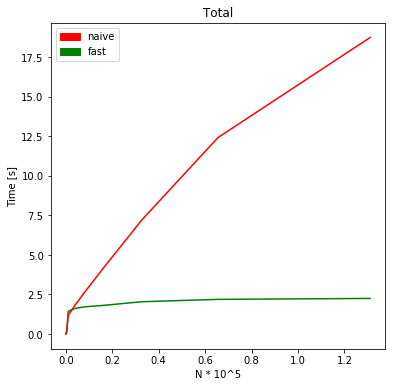

In [76]:
plt.figure(figsize=(6, 6))
plt.ylabel('Time [s]')
plt.xlabel('N * 10^5')
plt.plot(fns / 100000, ftotal / 1000, color='green')
plt.plot(sns / 100000, stotal / 1000, color='red')
red_patch = mpatches.Patch(color='red', label='naive')
green_patch = mpatches.Patch(color='green', label='fast')
plt.legend(handles=[red_patch, green_patch])
plt.title("Total")
plt.show()

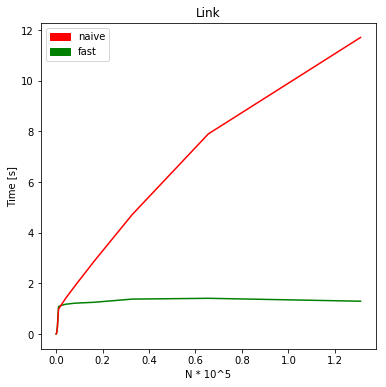

In [77]:
plt.figure(figsize=(6, 6))
plt.ylabel('Time [s]')
plt.xlabel('N * 10^5')
plt.plot(fns / 100000, flink / 1000, color='green')
plt.plot(sns / 100000, slink / 1000, color='red')
red_patch = mpatches.Patch(color='red', label='naive')
green_patch = mpatches.Patch(color='green', label='fast')
plt.legend(handles=[red_patch, green_patch])
plt.title("Link")
plt.show()

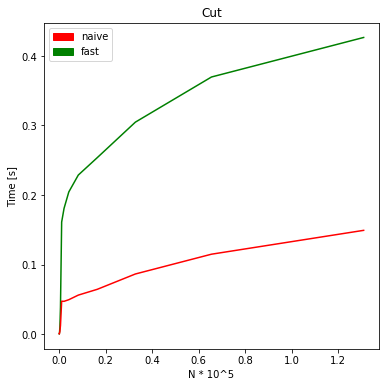

In [79]:
plt.figure(figsize=(6, 6))
plt.ylabel('Time [s]')
plt.xlabel('N * 10^5')
plt.plot(fns / 100000, fcut / 1000, color='green')
plt.plot(sns / 100000, scut / 1000, color='red')
red_patch = mpatches.Patch(color='red', label='naive')
green_patch = mpatches.Patch(color='green', label='fast')
plt.legend(handles=[red_patch, green_patch])
plt.title("Cut")
plt.show()

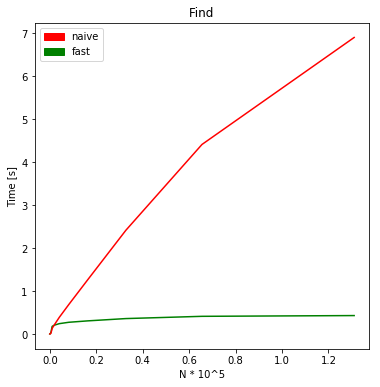

In [80]:
plt.figure(figsize=(6, 6))
plt.ylabel('Time [s]')
plt.xlabel('N * 10^5')
plt.plot(fns / 100000, ffind / 1000, color='green')
plt.plot(sns / 100000, sfind / 1000, color='red')
red_patch = mpatches.Patch(color='red', label='naive')
green_patch = mpatches.Patch(color='green', label='fast')
plt.legend(handles=[red_patch, green_patch])
plt.title("Find")
plt.show()

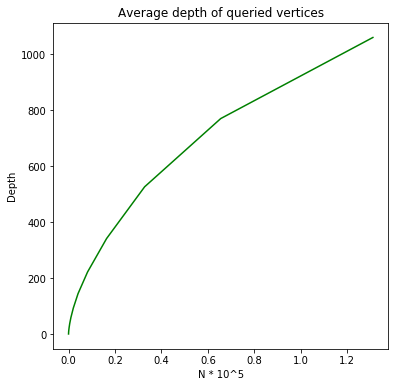

In [83]:
plt.figure(figsize=(6, 6))
plt.ylabel('Depth')
plt.xlabel('N * 10^5')
plt.plot(fns / 100000, fdepth, color='green')
plt.title("Average depth of queried vertices")
plt.show()